In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Since matplotlib's violinplot doesn't provide "label=xxx" for legends,
# we provide a custom Handles class to create legend handles.
from physics_plot import Handles

plt.style.use("physics_plot.pp_base")

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
rng = np.random.default_rng(12345)
nbin = 5
t = np.sort(rng.random(nbin)) * 0.1

# Generate fake measurement data
mu_arr = rng.random(nbin) * 100
sigma_arr = rng.random(nbin) * 100
data = [
    rng.normal(loc=mu, scale=sigma, size=5000) for mu, sigma in zip(mu_arr, sigma_arr)
]

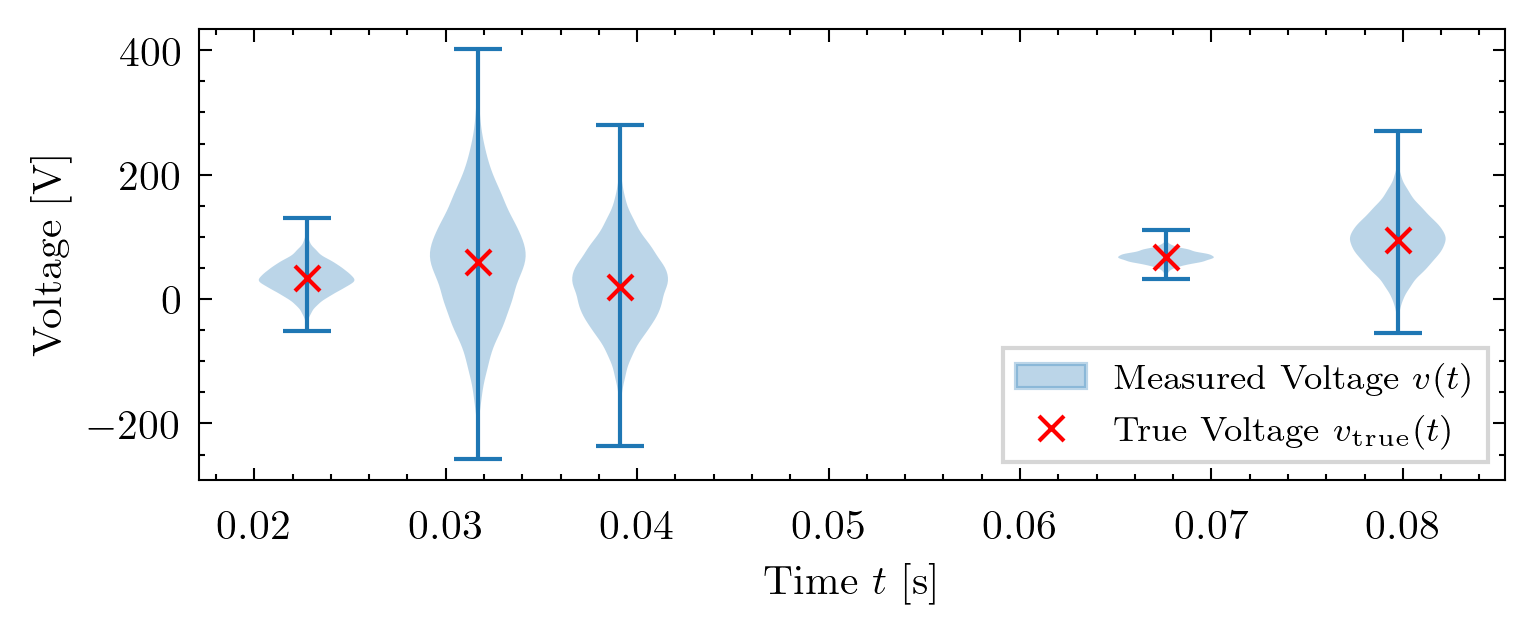

In [3]:
handles = Handles()

fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(5, 2), dpi=150, constrained_layout=True
)

# === Violin plot ===
vio_n = ax.violinplot(dataset=data, positions=t, widths=0.005)
# Add violin plot to handles for legend
handles.append_violinplot(vio_n, label=r"Measured Voltage $v(t)$")


# === True value plot ===
(mu_plot,) = ax.plot(t, mu_arr, "rx", label=r"True Voltage $v_\text{true}(t)$")
# Add true value plot to handles for legend
handles.append(mu_plot)


ax.legend(handles=handles)
ax.set_xlabel(r"Time $t$ [s]")
ax.set_ylabel("Voltage [V]")

plt.savefig("violin-plot@2x.png")